# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading Data and Exploring Data

- Loading csv file

In [3]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
print(f'Number of Rows: {df.shape[0]}')
print(f'Number of Columns: {df.shape[1]}')

Number of Rows: 10841
Number of Columns: 13


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [7]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


# Analyzing 'Size' column

In [8]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

## Observations:
- Varies with device
- M
- k

In [9]:
df['Size'].isnull().sum()

0

- There are no missing values in size column

- Finding the values having M in them

In [10]:
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8830

- Finding the values having k in them

In [11]:
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

- Finding the values having Varies with device in them

In [12]:
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

- Converting the whole size column into bytes

In [13]:
def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', ''))*1024
        elif 'M' in size:
            return float(size.replace('M', ''))*1024*1024
        if 'Varies with device' in size:
            return np.NaN
        return size

In [14]:
df['Size'] = df['Size'].apply(convert_size)

In [15]:
df['Size']

0        19922944.0
1        14680064.0
2         9122611.2
3        26214400.0
4         2936012.8
            ...    
10836    55574528.0
10837     3774873.6
10838     9961472.0
10839           NaN
10840    19922944.0
Name: Size, Length: 10841, dtype: float64

In [16]:
df.rename(columns = {'Size': 'Size_in_Bytes'}, inplace=True)

In [17]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


# Analyzing 'Installs' column

In [18]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [19]:
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [20]:
df['Installs'].isnull().sum()

0

In [21]:
df['Installs'] = df['Installs'].apply(lambda x : x.replace('+',"") if '+' in str(x) else x)

In [22]:
df['Installs'] = df['Installs'].apply(lambda x : x.replace(',',"") if ',' in str(x) else x)

In [23]:
df['Installs'].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

In [24]:
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [25]:
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [26]:
df['Installs_category'].value_counts()

Low                   2162
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: Installs_category, dtype: int64

# Analyzing 'Price' column

In [27]:
df['Price'].value_counts()

0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$19.90         1
$1.75          1
$14.00         1
$4.85          1
$1.04          1
Name: Price, Length: 92, dtype: int64

In [28]:
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

800

In [29]:
df['Price'] = df['Price'].apply(lambda x : x.replace('$',"") if '$' in str(x) else x)

In [30]:
df['Price'].value_counts()

0         10041
0.99        148
2.99        129
1.99         73
4.99         72
          ...  
19.90         1
1.75          1
14.00         1
4.85          1
1.04          1
Name: Price, Length: 92, dtype: int64

In [31]:
df['Price'] = df['Price'].apply(lambda x: float(x))

# Descriptive Statistics

In [32]:
df.describe()

,Rating,Reviews,Size_in_Bytes,Installs,Price
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000


# Dealing Missing Values

In [33]:
df.isnull().sum().sort_values(ascending= False)

Size_in_Bytes        1695
Rating               1474
Current Ver             8
Android Ver             2
Category                1
Type                    1
Genres                  1
App                     0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Last Updated            0
Installs_category       0
dtype: int64

- We can see that the Size_in_Bytes and Rating has the most no. of missing values

In [34]:
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)
print(f'Length of dataframe after dropping missing values:{len(df)}')

Length of dataframe after dropping missing values:10829


In [35]:
df.groupby('Installs_category').agg({'Rating': 'mean'})

,Rating
Installs_category,
no,NaN
Very low,4.637037
Low,4.170970
Moderate,4.035417
More than moderate,4.093255
High,4.207525
Very High,4.287076
Top Notch,4.374396


In [36]:
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Low                   880
Very low              453
Moderate               88
More than moderate     31
no                     14
High                    3
Very High               0
Top Notch               0
Name: Installs_category, dtype: int64

In [37]:
df.loc[df['Installs_category']=='Very low','Rating']=df.loc[df['Installs_category']=='Very low','Rating'].fillna(4.63)
df.loc[df['Installs_category']=='Low','Rating']=df.loc[df['Installs_category']=='Low','Rating'].fillna(4.17)
df.loc[df['Installs_category']=='Moderate','Rating']=df.loc[df['Installs_category']=='Moderate','Rating'].fillna(4.03)
df.loc[df['Installs_category']=='More than moderate','Rating']=df.loc[df['Installs_category']=='More than moderate','Rating'].fillna(4.09)
df.loc[df['Installs_category']=='High','Rating']=df.loc[df['Installs_category']=='High','Rating'].fillna(4.20)
df.loc[df['Installs_category']=='Very High','Rating']=df.loc[df['Installs_category']=='Very High','Rating'].fillna(4.28)
df.loc[df['Installs_category']=='Top Notch','Rating']=df.loc[df['Installs_category']=='Top Notch','Rating'].fillna(4.37)

In [38]:
df['Rating'].isnull().sum()

14

# Dealing Duplicate Values

In [39]:
df.duplicated().sum()

483

- We have 483 duplicate values in dataframe

In [40]:
for col in df.columns:
    print(f"Number of duplicates in {col} column are: {df[col].duplicated().sum()}")

Number of duplicates in App column are: 1181
Number of duplicates in Category column are: 10796
Number of duplicates in Rating column are: 10785
Number of duplicates in Reviews column are: 4830
Number of duplicates in Size_in_Bytes column are: 10373
Number of duplicates in Installs column are: 10809
Number of duplicates in Type column are: 10827
Number of duplicates in Price column are: 10737
Number of duplicates in Content Rating column are: 10823
Number of duplicates in Genres column are: 10710
Number of duplicates in Last Updated column are: 9453
Number of duplicates in Current Ver column are: 8046
Number of duplicates in Android Ver column are: 10796
Number of duplicates in Installs_category column are: 10821


In [41]:
# Dropping duplicate values
df.drop_duplicates(inplace=True)

In [42]:
print(f'Number of rows after removing duplicate values: {df.shape[0]}')

Number of rows after removing duplicate values: 10346


# Correlation Analysis

- We perform correlation analysis on continuous variable

<Axes: >

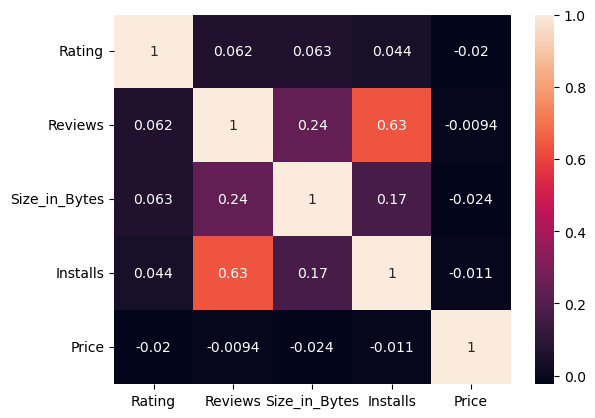

In [43]:
cols = ['Rating','Reviews','Size_in_Bytes','Installs','Price']
sns.heatmap(df[cols].corr(), annot = True)

- From the above Matrix, We can see that the reviews column has the higher correlation with Installs

<Axes: xlabel='Reviews', ylabel='Installs'>

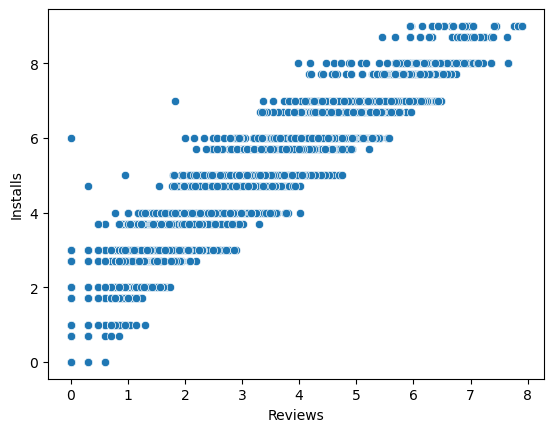

In [92]:
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df)

# Insights from data

- Now we have cleaned the data, we ask questions from dataset to gain insights

<Axes: xlabel='Rating', ylabel='Density'>

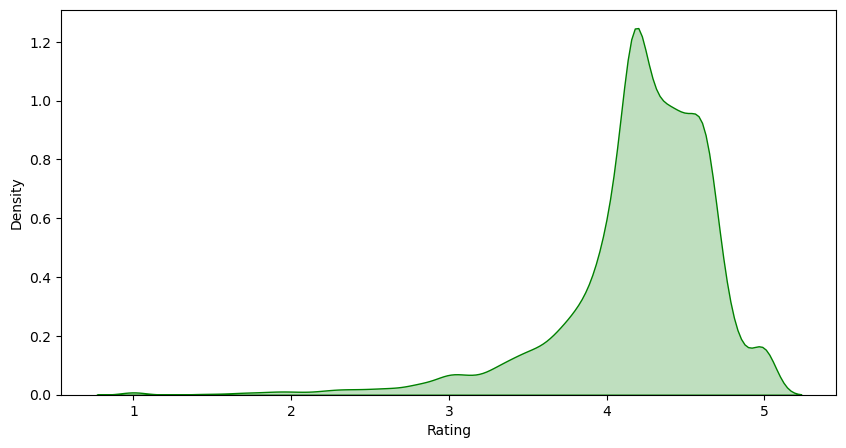

In [144]:
# How are the ratings distributed across different apps?
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Rating'], color="green", shade=True)

In [62]:
# Which category has the highest no. of apps?
top_category = df['Category'].value_counts().head(10)
top_category

FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: Category, dtype: int64

<Axes: title={'center': 'Top category'}, xlabel='count', ylabel='Category'>

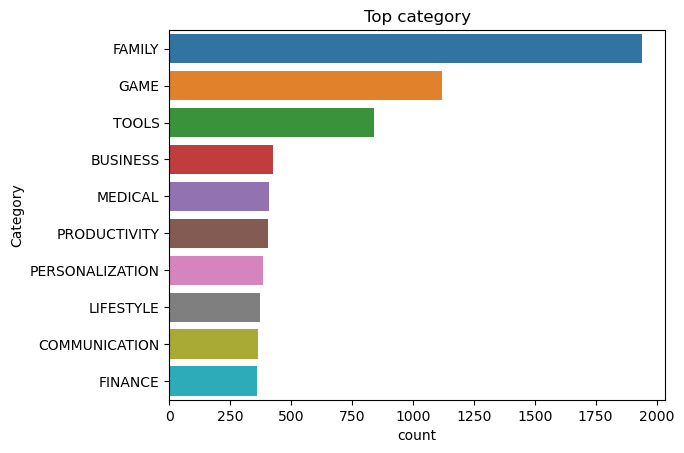

In [63]:
plt.title("Top category")
sns.countplot(y = df['Category'] , order = top_category.index)

In [162]:
#Which category has highest no. of installs
top_category_by_installs  = df.groupby('Category').agg({'Installs' : 'sum'})
top_category_by_installs.sort_values(by='Installs', ascending=False)

,Installs
Category,
GAME,31544024415
COMMUNICATION,24152276251
SOCIAL,12513867902
PRODUCTIVITY,12463091369
TOOLS,11452271905
FAMILY,10041632405
PHOTOGRAPHY,9721247655
TRAVEL_AND_LOCAL,6361887146
VIDEO_PLAYERS,6222002720


<Axes: title={'center': 'Top Category by Installs'}, xlabel='Installs', ylabel='Category'>

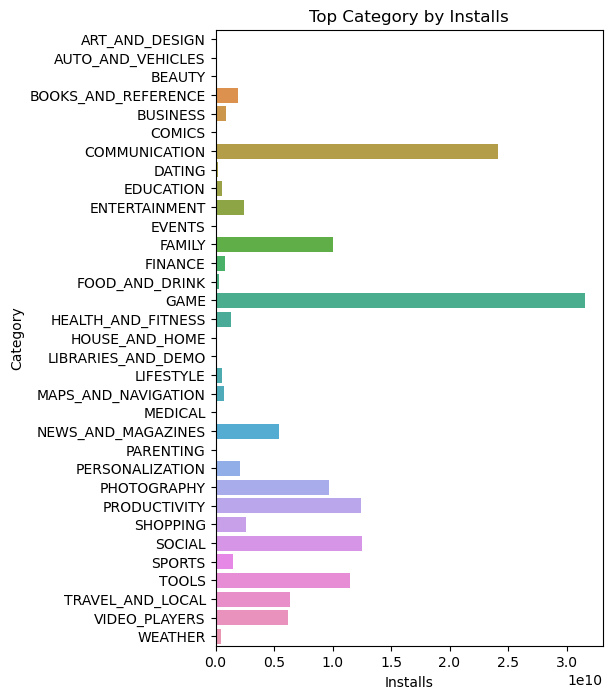

In [58]:
plt.figure(figsize=(5,8))
plt.title("Top Category by Installs")
sns.barplot(y = top_category_by_installs.index, x = top_category_by_installs['Installs'])

In [79]:
# How many free and paid apps are there?
counts= df['Type'].value_counts()
counts

Free    9584
Paid     762
Name: Type, dtype: int64

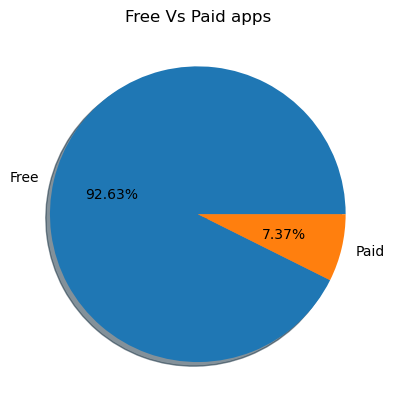

In [133]:
plt.title("Free Vs Paid apps")
plt.pie(counts,labels=counts.index,radius=1, autopct='%.2f%%', shadow = True)
plt.show()

In [161]:
#Which category has the highest average rating?
top_rated_category = df.groupby('Category').agg({'Rating' : 'mean'})
top_rated_category.sort_values(by='Rating', ascending=False)

,Rating
Category,
EVENTS,4.393281
EDUCATION,4.373769
ART_AND_DESIGN,4.366984
BOOKS_AND_REFERENCE,4.357467
PERSONALIZATION,4.332649
GAME,4.281811
HEALTH_AND_FITNESS,4.273399
SOCIAL,4.260072
PARENTING,4.259000


In [158]:
#Which Android version has the most apps?
most_apps_by_android_version = df['Android Ver'].value_counts()
most_apps_by_android_version

4.1 and up            2379
4.0.3 and up          1451
4.0 and up            1335
Varies with device    1220
4.4 and up             894
2.3 and up             642
5.0 and up             546
4.2 and up             386
2.3.3 and up           279
2.2 and up             239
3.0 and up             236
4.3 and up             235
2.1 and up             133
1.6 and up             115
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              31
5.1 and up              22
1.5 and up              19
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

<Axes: title={'center': 'App count by Android Version'}, xlabel='Android Ver', ylabel='count'>

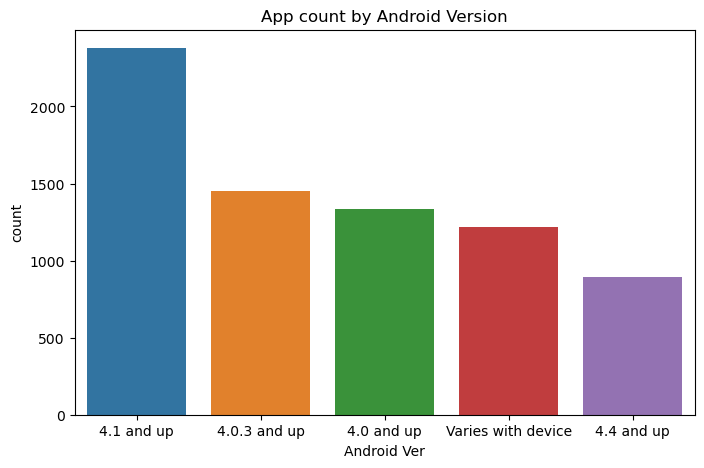

In [160]:
plt.figure(figsize=(8,5))
plt.title("App count by Android Version")
sns.countplot(x =df['Android Ver'], order = most_apps_by_android_version.head().index)

In [54]:
# top 10 reviewed apps
df.nlargest(10, 'Reviews')[['App', 'Reviews']]

,App,Reviews
2544,Facebook,78158306
3943,Facebook,78128208
336,WhatsApp Messenger,69119316
3904,WhatsApp Messenger,69109672
2604,Instagram,66577446
2545,Instagram,66577313
3909,Instagram,66509917
382,Messenger – Text and Video Chat for Free,56646578
335,Messenger – Text and Video Chat for Free,56642847
1879,Clash of Clans,44893888


In [125]:
# top 20 Biggest apps by size
df.nlargest(20, 'Size_in_Bytes')[['App', 'Size_in_Bytes']]

,App,Size_in_Bytes
1080,Post Bank,104857600.0
1565,Talking Babsy Baby: Baby Games,104857600.0
1758,Hungry Shark Evolution,104857600.0
1793,Mini Golf King - Multiplayer Game,104857600.0
1988,Hungry Shark Evolution,104857600.0
2299,Navi Radiography Pro,104857600.0
3973,Hungry Shark Evolution,104857600.0
4690,Vi Trainer,104857600.0
5427,Ultimate Tennis,104857600.0
5530,The Walking Dead: Our World,104857600.0


In [128]:
#  Which type of apps have highest average rating
df.groupby('Type').agg({'Rating' : 'mean'})

,Rating
Type,
Free,4.197069
Paid,4.294668


In [129]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,More than moderate


In [131]:
# Top 20 most expensive apps
df.nlargest(20, 'Price')[['App', 'Price']]

,App,Price
4367,I'm Rich - Trump Edition,400.00
4197,most expensive app (H),399.99
4362,💎 I'm rich,399.99
5351,I am rich,399.99
5354,I am Rich Plus,399.99
5356,I Am Rich Premium,399.99
5358,I am Rich!,399.99
5359,I am rich(premium),399.99
5362,I Am Rich Pro,399.99
5364,I am rich (Most expensive app),399.99


In [149]:
# Which content has highest no. off apps?
df['Content Rating'].value_counts()

Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

<Axes: title={'center': 'Apps by Content Rating'}, xlabel='Content Rating', ylabel='count'>

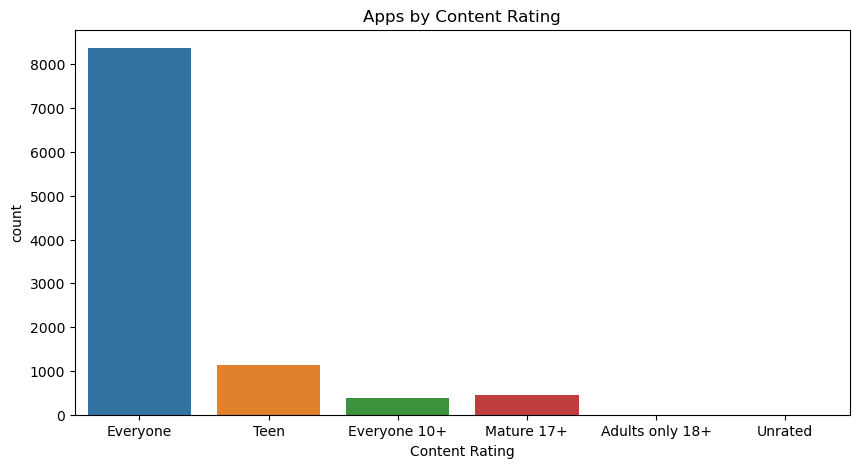

In [164]:
plt.figure(figsize=(10,5))
plt.title('Apps by Content Rating')
sns.countplot(x = df['Content Rating'])

# Summary 

- Reviews column has higher correlation with Installs column. Number of Reviews increases with the number of Installs, which is obvious.
- The majority of apps are distributed around a rating of 4.
- The 'Family' category has the most apps in this data. 'Game' category is next with the second highest number.
- In this data, Games have the most installations. Communication and social apps come next in terms of how many people have them.
- Majority of apps are free (about 92.63%) as compared to paid apps.
- The 'Events' category has the hisghest average rating while the 'Dating' category receives lowest average rating.
- In this dataset, Many apps worked with Android version 4.1 and newer.
- The paid apps have the highest average rating as compared to free apps.
- Most apps have a content rating of 'Everyone', but there are only two apps without any rating
